# 2D example

In [91]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [92]:
import sys
import watershed3d
from skimage.morphology import watershed
import matplotlib as mpl
from skimage.measure import regionprops
import pandas as pd
import tifffile as tiff
from matplotlib.pylab import imshow, plot, subplots, hist, scatter, bar, step

load file 

In [104]:
filename = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c1.tif'
w = watershed3d.Ws3d(filename)

load Ilastik probability mask and plot it

In [105]:
w.load_mask(prob=0.5)
# w.plot_probability_map(21)

In [106]:
w.segment(sigma=(4,4), min_distance=2, compactness=0.05)

show segmentation

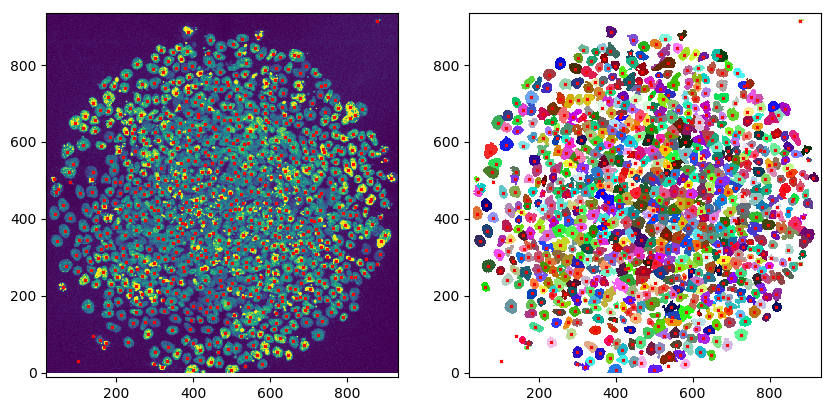

In [107]:
w.show_segmentation(figsize=(10,10), ms=2)

In [108]:
w.df.head()

,area,total_intensity,mean_intensity,centroid,centroid_rescaled,label
cell_id,,,,,,
1,732,2713.0,2605.878415,"[9.744535519125684, 397.6379781420765]","[9.744535519125684, 397.6379781420765]",1
2,738,2535.0,2458.261518,"[10.13279132791328, 501.1490514905149]","[10.13279132791328, 501.1490514905149]",2
3,329,1944.0,6950.854103,"[15.52887537993921, 320.1337386018237]","[15.52887537993921, 320.1337386018237]",3
4,71,1193.0,1225.042254,"[17.281690140845072, 535.5915492957746]","[17.281690140845072, 535.5915492957746]",4
5,196,1658.5,4282.918367,"[22.331632653061224, 299.67857142857144]","[22.331632653061224, 299.67857142857144]",5


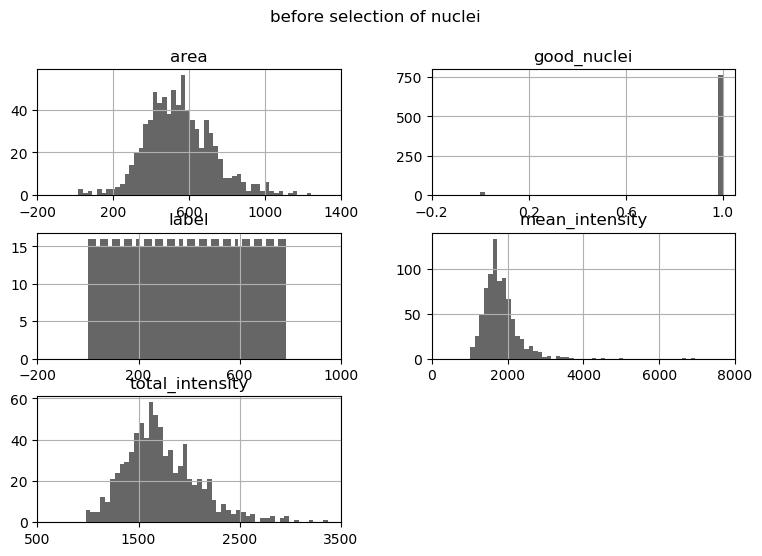

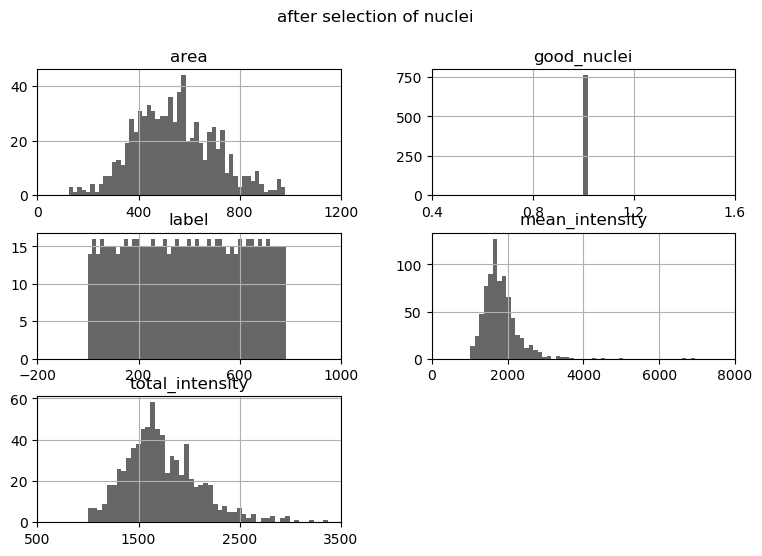

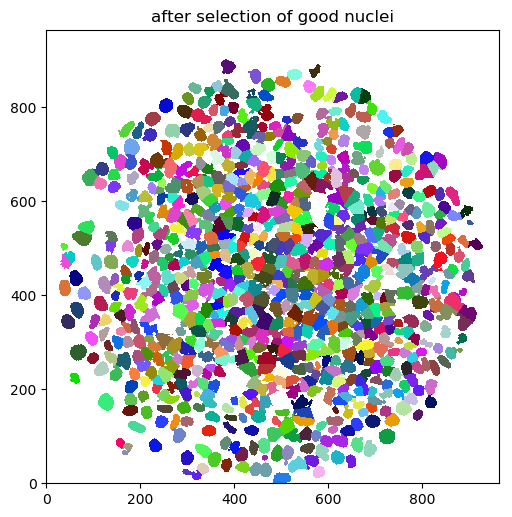

In [110]:
w.select_nuclei(cutoff=[100,1000], plot=1)

apply to other channels

In [111]:
filename_bra = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c3.tif'
filename_sox17 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c2.tif'
filename_sox2 = '/Users/jakob/Documents/RU/Data/ufo_min/T0162/MAX_UFO20150807_stitched001_T0162_c4.tif'

example of background subtraction

In [112]:
n=100
np.partition(s2[s2.nonzero()], n)[:n].max()
s2.dtype

dtype('uint16')

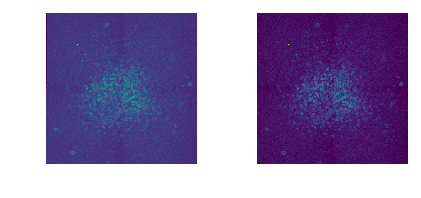

In [113]:
s2=tiff.imread(filename_sox2)
fig,ax=subplots(1,2, figsize=(5,2))
ax[0].imshow(s2, cmap='viridis', origin='lower')
ax[1].imshow(watershed3d.remove_background_func(s2), cmap='viridis', origin='lower')
[aax.axis('off') for aax in ax];

In [114]:
w.apply_to_channels(filename_sox2, 'sox2')
w.apply_to_channels(filename_bra, 'bra')
w.apply_to_channels(filename_sox17, 'sox17')

In [115]:
# w.df.drop('good_nuclei', axis=1, inplace=1)

In [116]:
w.df.head()
# w.good_nuclei.head()

,area,total_intensity,mean_intensity,centroid,centroid_rescaled,label,good_nuclei,sox2,sox2_norm,bra,bra_norm,sox17,sox17_norm
cell_id,,,,,,,,,,,,,
1,732,2713.0,2605.878415,"[9.744535519125684, 397.6379781420765]","[9.744535519125684, 397.6379781420765]",1,True,468.5,0.179786,243.0,0.093251,173.0,0.066388
2,738,2535.0,2458.261518,"[10.13279132791328, 501.1490514905149]","[10.13279132791328, 501.1490514905149]",2,True,351.0,0.142784,242.0,0.098444,171.0,0.069561
3,329,1944.0,6950.854103,"[15.52887537993921, 320.1337386018237]","[15.52887537993921, 320.1337386018237]",3,True,382.0,0.054957,262.0,0.037693,179.0,0.025752
4,71,1193.0,1225.042254,"[17.281690140845072, 535.5915492957746]","[17.281690140845072, 535.5915492957746]",4,False,420.0,0.342845,281.0,0.229380,189.0,0.154280
5,196,1658.5,4282.918367,"[22.331632653061224, 299.67857142857144]","[22.331632653061224, 299.67857142857144]",5,True,397.5,0.092811,264.5,0.061757,180.0,0.042027


In [117]:
w.center

array([  0.        , 440.21694498, 482.08221058])

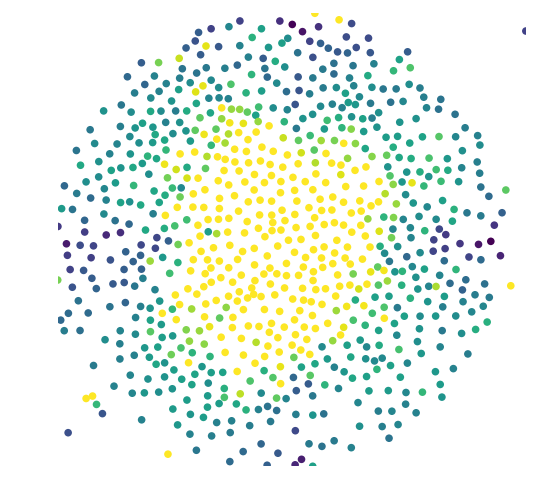

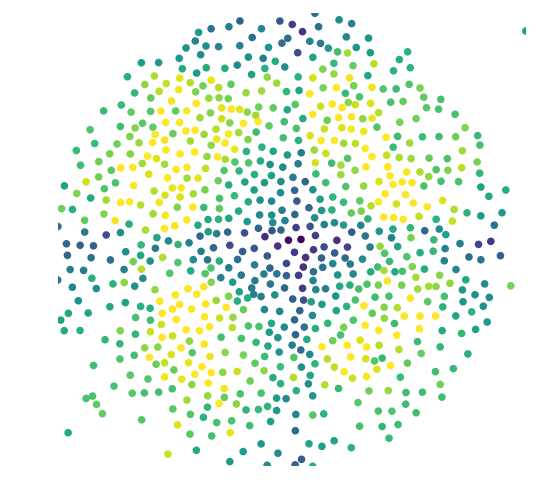

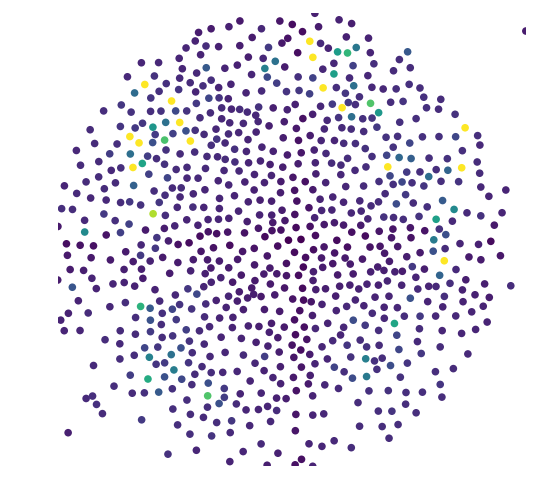

In [118]:
watershed3d.dot_plot(w,'sox2', colormap_cutoff=0.5)
watershed3d.dot_plot(w,'bra', colormap_cutoff=0.7)
watershed3d.dot_plot(w,'sox17', colormap_cutoff=0.4)

/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py:1494: RuntimeWarning: invalid value encountered in true_divide
  ax.step(xn[:-1] - xn[0], n / n2, where='mid')
/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py:1495: RuntimeWarning: invalid value encountered in true_divide
  ax.fill_between(xn[:-1] - xn[0], n / n2, alpha=0.2, step='mid')
/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py:1501: RuntimeWarning: invalid value encountered in true_divide
  return_vec = n/n2


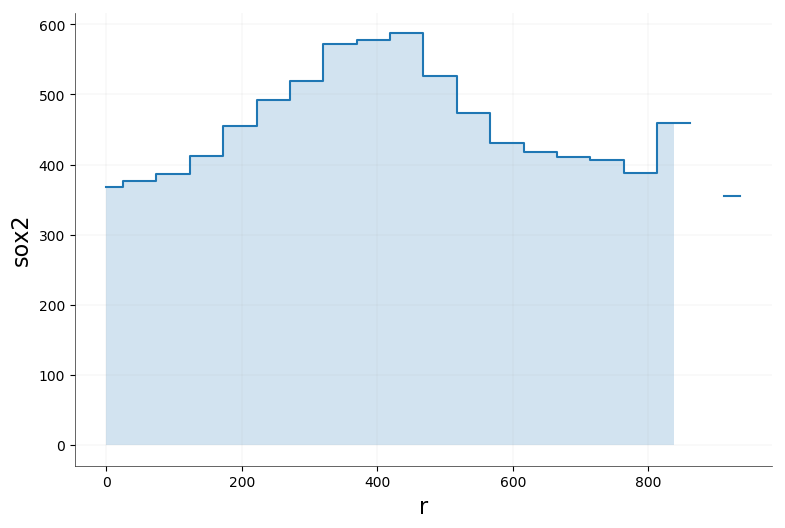

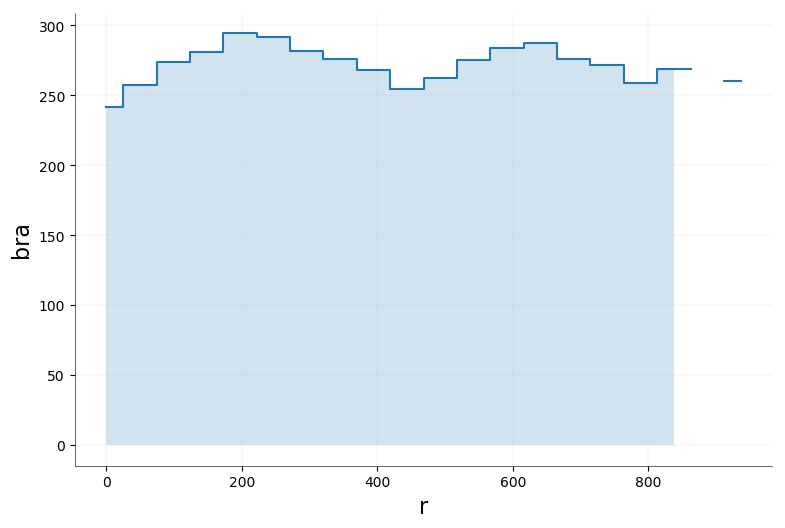

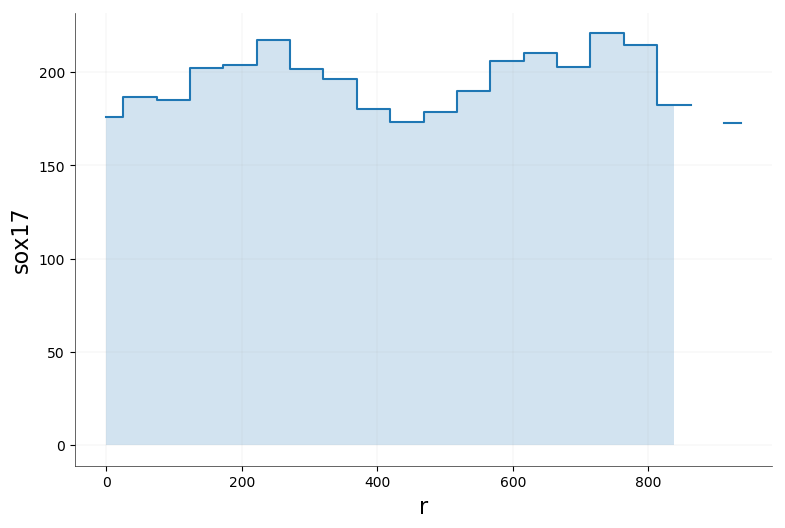

In [121]:
watershed3d.radial_profile_per_cell(w,'sox2',20, only_selected_cells=0);
watershed3d.radial_profile_per_cell(w,'bra',20, only_selected_cells=0);
watershed3d.radial_profile_per_cell(w,'sox17',20, only_selected_cells=0);

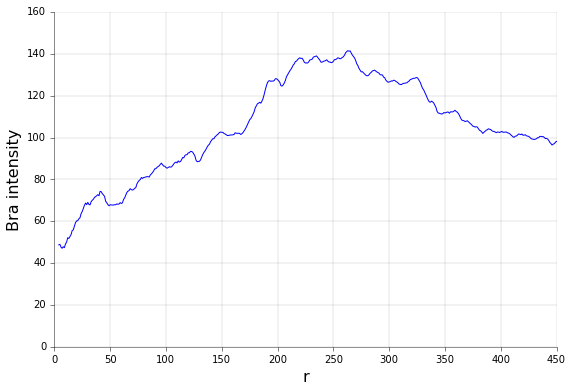

In [22]:
r,rs = w.radial_intensity('bra', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,pd.DataFrame(rs).rolling(5).mean())
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Bra intensity', fontsize=16)
w.nice_spines(ax)

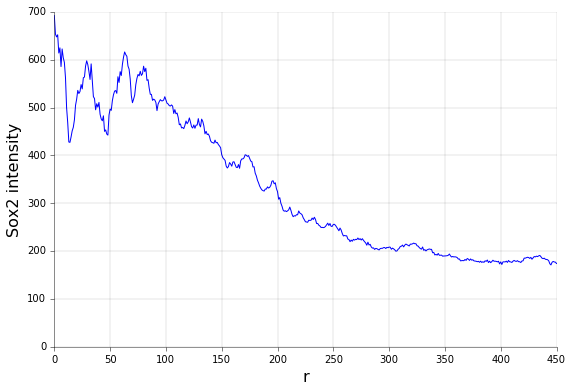

In [23]:
r,rs = w.radial_intensity('sox2', only_selected_nuclei=1, plot=False)
fig,ax=subplots()
ax.plot(r,rs)
ax.set_xlim([0,450])
ax.set_xlabel('r', fontsize=16)
ax.set_ylabel('Sox2 intensity', fontsize=16)
w.nice_spines(ax)

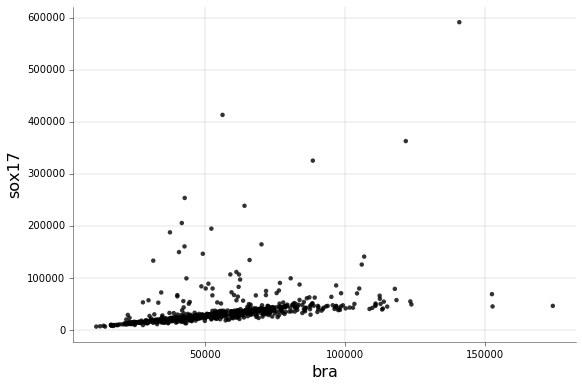

In [24]:
w.coexpression_per_cell('bra', 'sox17', only_selected_cells=1)

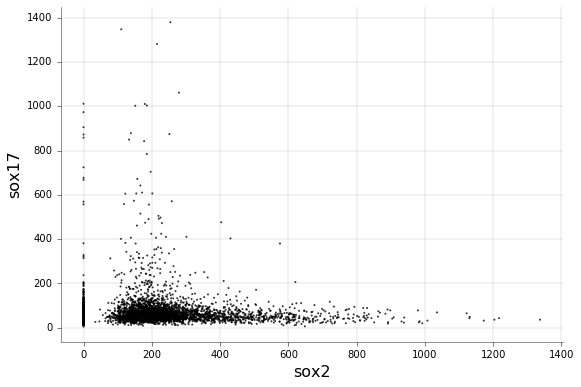

In [25]:
w.coexpression_per_pixel('sox2', 'sox17', downsample=100, only_selected_cells=0)